# Importing Essential Libraries

In [7]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.13.1-cp312-cp312-win_amd64.whl.metadata (48 kB)
  Usi

In [18]:
! pip install --upgrade tensorflow


  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# Loading the Digit's DataSet

In [94]:
root_dir = r'C:\Users\HARSHAL\Signlanguagedetection\asl\American Sign Language Digits Dataset'


image_data = []

for label in range(10):
    label_dir = os.path.join(root_dir, str(label), 'Input Images - Sign {}'.format(label))
    for image_file in os.listdir(label_dir):
        image = Image.open(os.path.join(label_dir, image_file))
        image_data.append({
            'label': label,
            'color_image': image
        })

df = pd.DataFrame(image_data)

In [96]:
df

label                                        color_image
0         0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1         0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2         0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3         0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4         0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
...     ...                                                ...
4995      9  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4996      9  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4997      9  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4998      9  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4999      9  <PIL.JpegImagePlugin.JpegImageFile image mode=...

[5000 rows x 2 columns]

# Data Visualization (EDA)

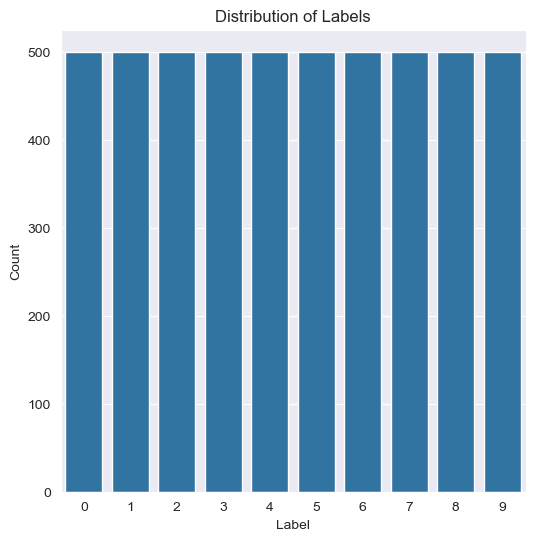

In [99]:
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

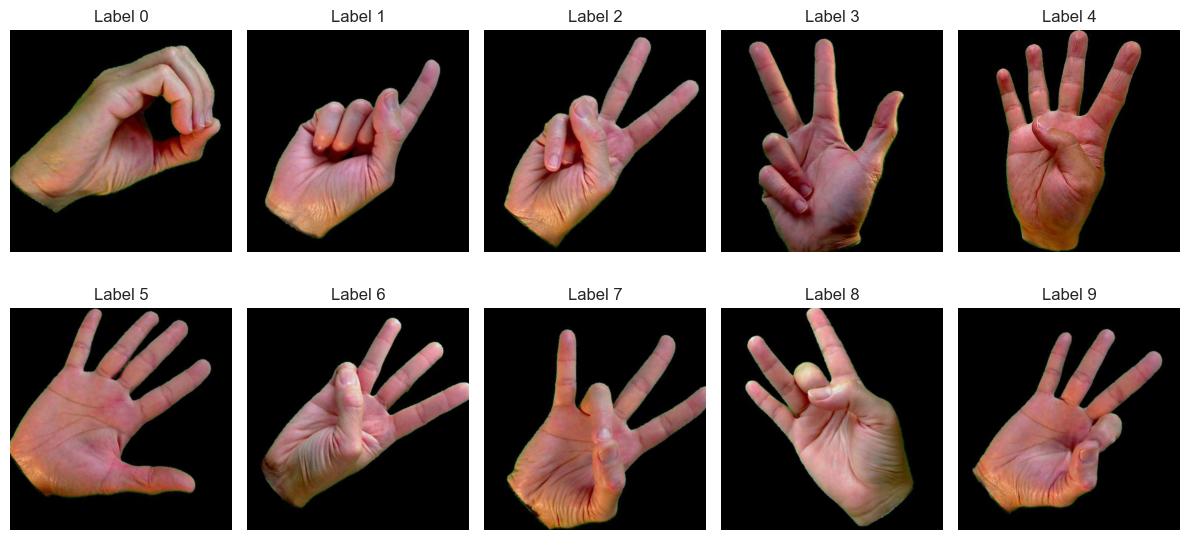

In [101]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [104]:
# Preprocessing steps
images = np.array(df['color_image'].tolist())
labels = np.array(df['label'])

In [110]:
resized_images = []

for image in images:
    if isinstance(image, np.ndarray):  # If image is a NumPy array
        image = Image.fromarray(image)  # Convert NumPy array to Pillow Image

    resized_image = image.resize((32, 32))  # Resize the image to (32, 32)
    resized_images.append(np.array(resized_image))  # Convert back to NumPy array

images = np.array(resized_images)


In [112]:
# Normalize pixel values
images = images / 255.0

# Splitting the Data into Train Test Split

In [115]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [117]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [120]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 75)     │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,217 (1008.66 KB)

 Trainable params: 257,917 (1007.49 KB)

 Non-trainable params: 300 (1.17 KB)

# Data Augmentation

In [123]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting of the Model

In [126]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.0001)
history = model.fit(datagen.flow(X_train, y_train), epochs=30, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3056 - loss: 2.0865 - val_accuracy: 0.1110 - val_loss: 2.2481 - learning_rate: 0.0100
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7111 - loss: 0.8483 - val_accuracy: 0.1990 - val_loss: 2.0757 - learning_rate: 0.0100
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8327 - loss: 0.5176 - val_accuracy: 0.5160 - val_loss: 1.1872 - learning_rate: 0.0100
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8920 - loss: 0.3486 - val_accuracy: 0.9000 - val_loss: 0.4309 - learning_rate: 0.0100
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9168 - loss: 0.2590 - val_accuracy: 0.9850 - val_loss: 0.1201 - learning_rate: 0.0100
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9450 - loss: 0.1959 - val_accuracy: 0.9810 - val_loss: 0.1144 - learning_rate: 0.0100
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9534 - loss: 0.

# Model Evaluation

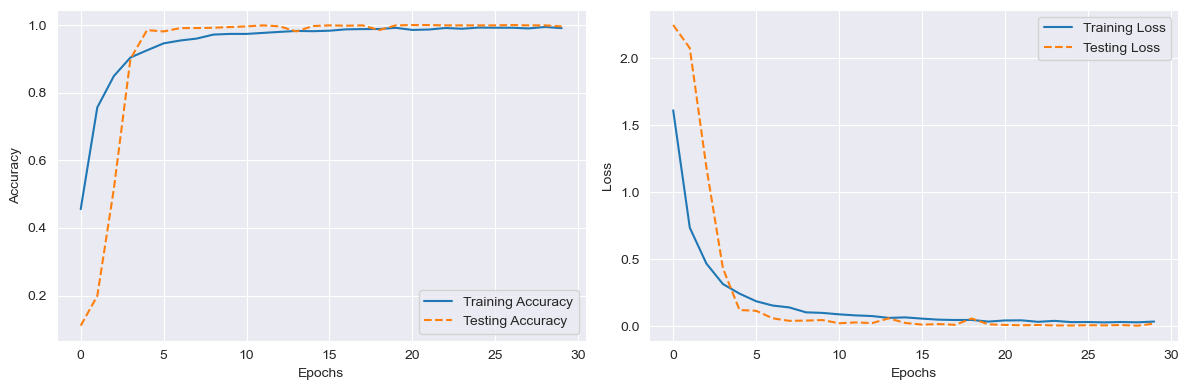

In [128]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [130]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [132]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

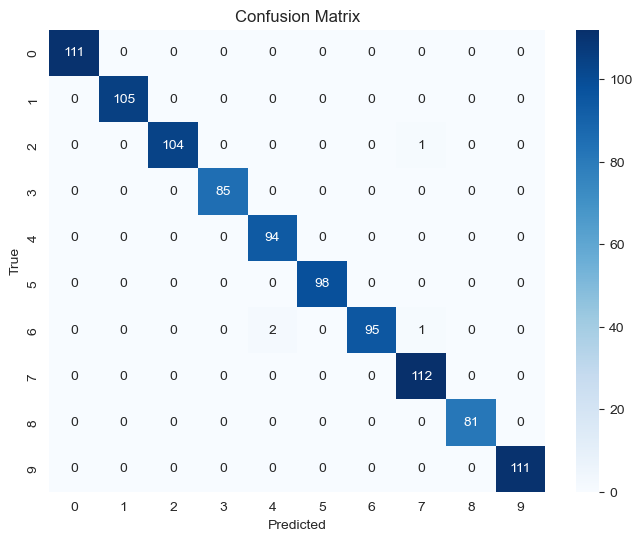

In [134]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [136]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9951 - loss: 0.0167
validation test results - Loss: 0.018764210864901543 - Accuracy: 99.59999918937683%


# Saving the Model

In [139]:
model.save("digitSignLanguage.h5")

# Loading the Dataset

In [142]:
train_df = pd.read_csv(r"C:\Users\HARSHAL\Signlanguagedetection\mnistdataset\mnistdataset\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\HARSHAL\Signlanguagedetection\mnistdataset\mnistdataset\sign_mnist_test\sign_mnist_test.csv")


In [144]:
train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

# Data Visualization (EDA)

In [147]:
fig = px.histogram(train_df, x='label',color='label', title='Distribution of Labels in Training Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

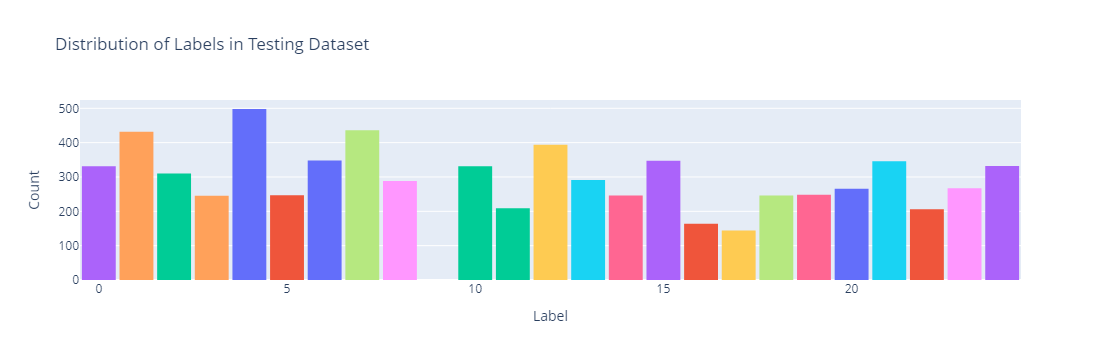

In [148]:
fig = px.histogram(test_df, x='label',color='label', title='Distribution of Labels in Testing Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

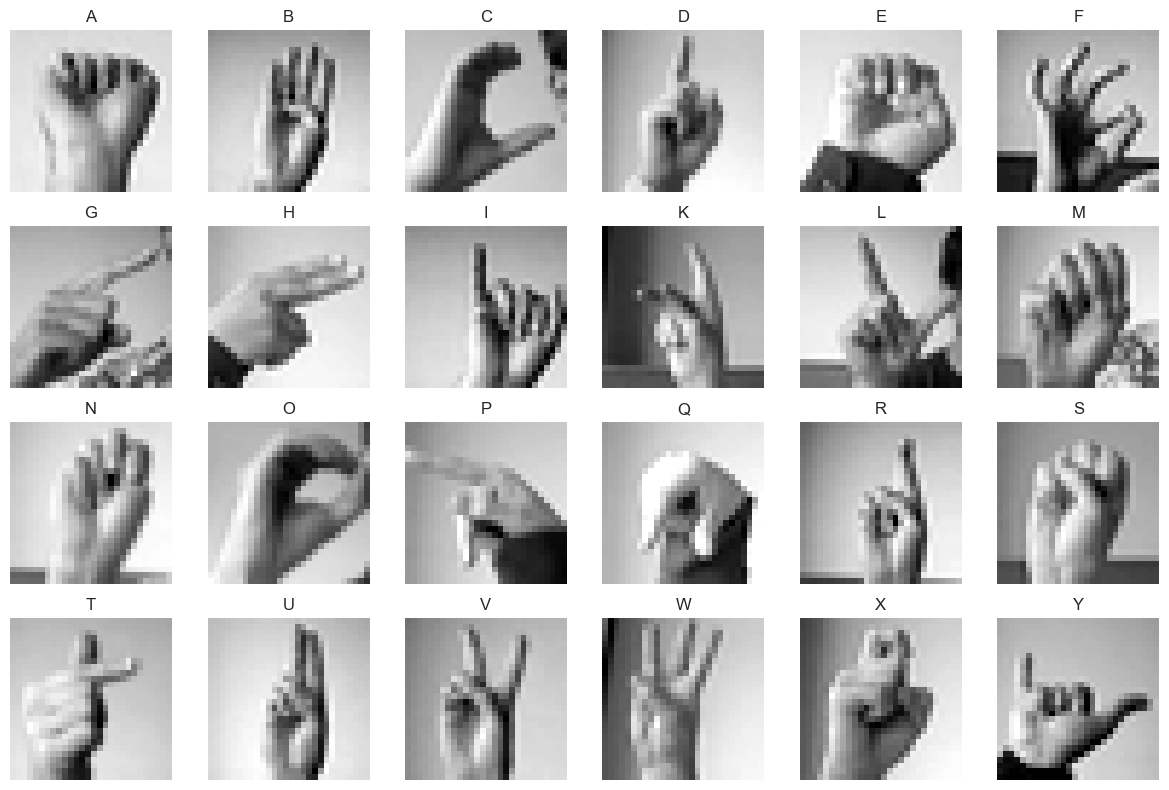

In [150]:
# Group the dataframe by the 'label' column
label_groups = train_df.groupby('label')

# Iterate over each label group and display one image
fig, axs = plt.subplots(4, 6, figsize=(12, 8))

for i, (label, group) in enumerate(label_groups):
    # Get the first image from the group
    image = group.iloc[0, 1:].values.reshape(28, 28)
    
    # Calculate the subplot index
    row = i // 6
    col = i % 6
    
    # Convert label to integer and add 65 to get ASCII value
    ascii_value = int(label) + 65
    
    # Display the image
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(chr(ascii_value))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Preprocessing the Data

In [154]:
X_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df["label"]

In [156]:
X_test = test_df.drop(labels = ["label"],axis = 1)
y_test = test_df["label"]

In [158]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [160]:
# Reshape the data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [162]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [164]:
# Convert the labels to one-hot encoded format
num_classes = 25
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [166]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


# Model Architecture

In [171]:
from tensorflow.keras.optimizers import RMSprop

# Create the CNN model
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08), 
              loss='categorical_crossentropy', metrics=['accuracy'])


# Data Augmentation

In [174]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting of the Model

In [179]:
# Training the model
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.0001)

history = model.fit(datagen.flow(X_train, y_train), 
                    epochs=25, 
                    validation_data=(X_test, y_test), 
                    verbose=1, 
                    callbacks=[learning_rate_reduction])


Epoch 1/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 91s 105ms/step - accuracy: 0.3276 - loss: 2.2272 - val_accuracy: 0.9442 - val_loss: 0.1458 - learning_rate: 0.0010
Epoch 2/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 88s 103ms/step - accuracy: 0.9041 - loss: 0.2857 - val_accuracy: 0.9789 - val_loss: 0.0588 - learning_rate: 0.0010
Epoch 3/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 93s 109ms/step - accuracy: 0.9593 - loss: 0.1274 - val_accuracy: 0.9967 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 4/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.9763 - loss: 0.0803 - val_accuracy: 1.0000 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 5/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 93s 108ms/step - accuracy: 0.9786 - loss: 0.0665 - val_accuracy: 0.9972 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 6/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - accuracy: 0.9814 - loss: 0.0594 - val_accuracy: 0.9974 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 7/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.9

# Model Evaluation

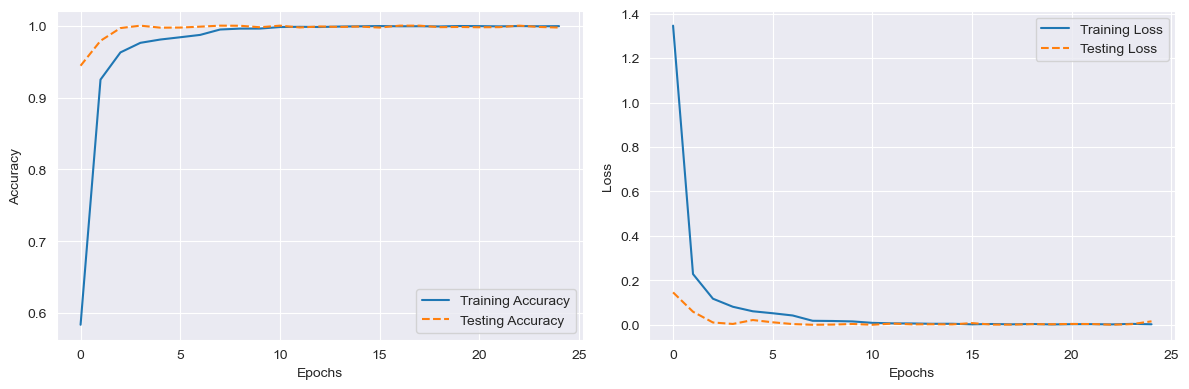

In [181]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [182]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step


In [183]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

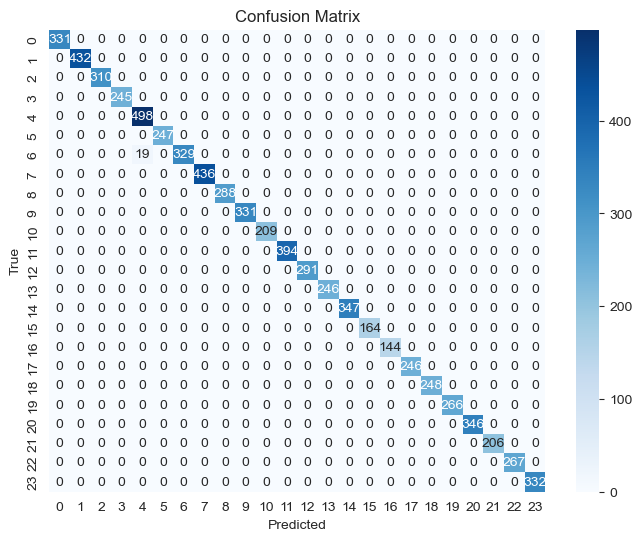

In [184]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [185]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9973 - loss: 0.0166
validation test results - Loss: 0.015657348558306694 - Accuracy: 99.7350811958313%


# Saving the Model

In [187]:
model.save("americanSignLanguage.h5")

# Loading Datast

In [37]:
import os
from PIL import Image
import pandas as pd

# Define the root directory path
root_dir = "C:/Users/HARSHAL/Signlanguagedetection/archive/Indian"

# Maximum number of images to load from each subdir_path
max_images_per_subdir = 500

# Initialize a list to store the image data
image_data = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir):
    # Check if the subdirectory is numeric
    if not label.isdigit():
        # Get the path to the subdirectory
        subdir_path = os.path.join(root_dir, label)
        
        # Process images one by one to avoid keeping file handles open
        for i, file in enumerate(os.listdir(subdir_path)):
            if i >= max_images_per_subdir:
                break  # Stop processing after reaching the limit
            
            file_path = os.path.join(subdir_path, file)
            try:
                # Open the image using a context manager
                with Image.open(file_path) as img:
                    # Convert the image to RGB and add it to the list
                    image_data.append({
                        'label': label,
                        'color_image': img.convert('RGB')
                    })
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Display the DataFrame
print(df.head())


  label                                        color_image
0     A  <PIL.Image.Image image mode=RGB size=128x128 a...
1     A  <PIL.Image.Image image mode=RGB size=128x128 a...
2     A  <PIL.Image.Image image mode=RGB size=128x128 a...
3     A  <PIL.Image.Image image mode=RGB size=128x128 a...
4     A  <PIL.Image.Image image mode=RGB size=128x128 a...


In [39]:
df

label                                        color_image
0         A  <PIL.Image.Image image mode=RGB size=128x128 a...
1         A  <PIL.Image.Image image mode=RGB size=128x128 a...
2         A  <PIL.Image.Image image mode=RGB size=128x128 a...
3         A  <PIL.Image.Image image mode=RGB size=128x128 a...
4         A  <PIL.Image.Image image mode=RGB size=128x128 a...
...     ...                                                ...
12995     Z  <PIL.Image.Image image mode=RGB size=128x128 a...
12996     Z  <PIL.Image.Image image mode=RGB size=128x128 a...
12997     Z  <PIL.Image.Image image mode=RGB size=128x128 a...
12998     Z  <PIL.Image.Image image mode=RGB size=128x128 a...
12999     Z  <PIL.Image.Image image mode=RGB size=128x128 a...

[13000 rows x 2 columns]

In [41]:
df['label'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Data Visualization (EDA)

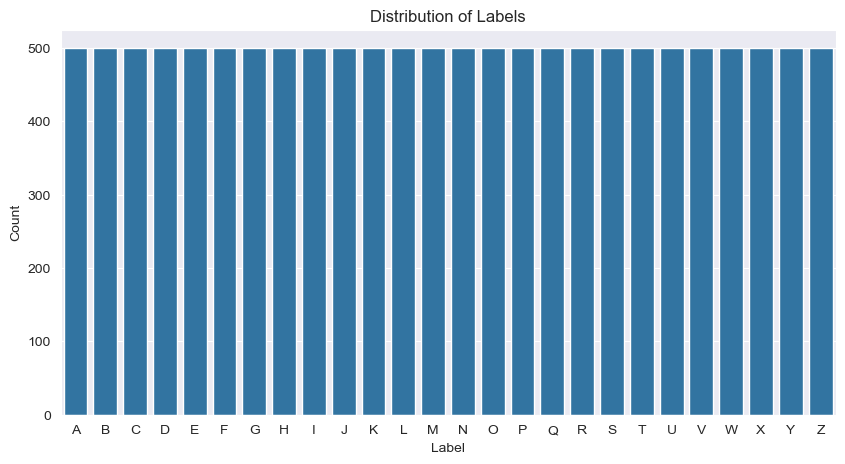

In [44]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

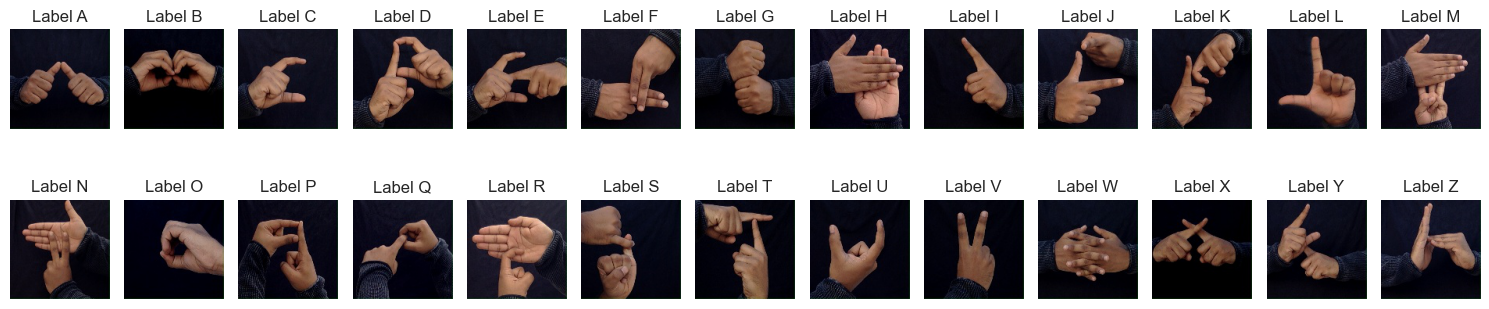

In [46]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [53]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Specify the desired image dimensions
target_size = (128, 128)  # Change as needed

# Preprocess the images
images = []
labels = []

for i, row in df.iterrows():
    try:
        # Resize and convert the image to a NumPy array
        img = row['color_image'].resize(target_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row['label'])
    except Exception as e:
        print(f"Error processing image at index {i}: {e}")

# Convert to NumPy arrays
images = np.array(images, dtype='float32') / 255.0  # Normalize to [0, 1]
labels = np.array(labels)

print(f"Processed {len(images)} images.")


Processed 13000 images.


In [58]:
from PIL import Image
import numpy as np

# Ensure 'images' contains PIL Image objects before resizing
resized_images = []
for image in images:
    try:
        # Convert NumPy array back to PIL Image if necessary
        if isinstance(image, np.ndarray):
            image = Image.fromarray((image * 255).astype('uint8'))  # Convert normalized array back to 0-255 range

        # Resize the image
        resized_image = image.resize((32, 32))
        resized_images.append(np.array(resized_image))
    except Exception as e:
        print(f"Error resizing image: {e}")

# Convert back to a NumPy array
images = np.array(resized_images)
print(f"Resized images shape: {images.shape}")


Resized images shape: (13000, 32, 32, 3)


In [60]:
# Normalize pixel values
images = images / 255.0

In [62]:
# Map labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Splitting the data into Training and Testing

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [67]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [70]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 75)     │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,425 (1.02 MB)

 Trainable params: 266,125 (1.02 MB)

 Non-trainable params: 300 (1.17 KB)

# Data Augmentation

In [73]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting the Model

In [76]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)
history = model.fit(datagen.flow(X_train,y_train), epochs=25, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6828 - loss: 1.2392 - val_accuracy: 0.4377 - val_loss: 2.2169 - learning_rate: 0.0100
Epoch 2/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9859 - loss: 0.0824 - val_accuracy: 1.0000 - val_loss: 0.0278 - learning_rate: 0.0100
Epoch 3/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9928 - loss: 0.0433 - val_accuracy: 1.0000 - val_loss: 0.0027 - learning_rate: 0.0100
Epoch 4/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9971 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 0.0015 - learning_rate: 0.0100
Epoch 5/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9978 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0023 - learning_rate: 0.0100
Epoch 6/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9975 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 4.2150e-04 - learning_rate: 0.0100
Epoch 7/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9991 - loss

# Model Evaluation

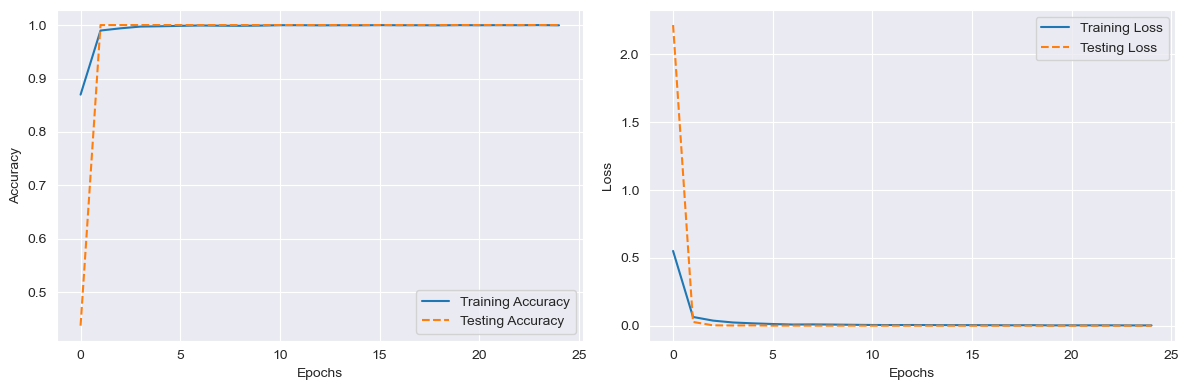

In [79]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [81]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [83]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

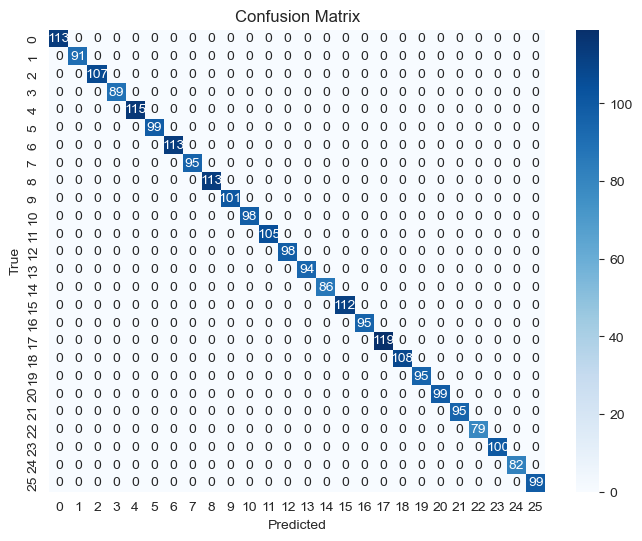

In [85]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [87]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.0072e-05
validation test results - Loss: 6.645383109571412e-05 - Accuracy: 100.0%


# Saving the Model

In [90]:
model.save("indianSignLanguage.h5")